In [2]:
# 本次task目的是使用pytorch基础代码和nn.moudle实现Logistic回归
import torch
import torch.nn as nn
n_data = torch.ones(100,2)

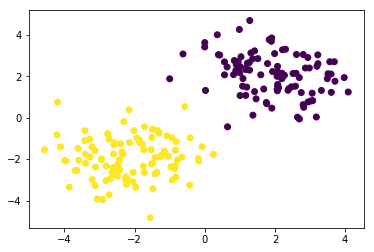

In [7]:
# 生成一些随机数用于实验
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) 
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)
# 画图看一下数据的分布
import matplotlib.pyplot as plt
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:,1],c=y.data.numpy())
plt.show()

In [26]:
# 我们先使用基础代码来实现一下logistic回归
# 设置一下偏置和权重
from torch.autograd import Variable
w = Variable(torch.randn(2,1),requires_grad=True)
b = Variable(torch.zeros(1,1),requires_grad=True)
EPOCHS = 200
likelihood = []
learning_rate = 0.01
for epoch in range(EPOCHS):
    a = 1/(1+torch.exp(-(x.mm(w)+b)))
    j = -torch.mean(y*torch.log(a)+(1-y)*torch.log(1-a))
    likelihood.append(-j.data.numpy().item())
    j.backward()
    w.data = w.data - learning_rate*w.grad
    b.data = b.data - learning_rate*b.grad
    w.grad.data.zero_()
    b.grad.data.zero_()
    print("交叉熵损失为：{:.3f}".format(j))

交叉熵损失为：2.206
交叉熵损失为：2.188
交叉熵损失为：2.171
交叉熵损失为：2.153
交叉熵损失为：2.135
交叉熵损失为：2.118
交叉熵损失为：2.100
交叉熵损失为：2.083
交叉熵损失为：2.065
交叉熵损失为：2.048
交叉熵损失为：2.031
交叉熵损失为：2.013
交叉熵损失为：1.996
交叉熵损失为：1.979
交叉熵损失为：1.962
交叉熵损失为：1.945
交叉熵损失为：1.929
交叉熵损失为：1.912
交叉熵损失为：1.895
交叉熵损失为：1.879
交叉熵损失为：1.862
交叉熵损失为：1.846
交叉熵损失为：1.830
交叉熵损失为：1.814
交叉熵损失为：1.798
交叉熵损失为：1.782
交叉熵损失为：1.766
交叉熵损失为：1.750
交叉熵损失为：1.735
交叉熵损失为：1.719
交叉熵损失为：1.704
交叉熵损失为：1.689
交叉熵损失为：1.674
交叉熵损失为：1.659
交叉熵损失为：1.644
交叉熵损失为：1.629
交叉熵损失为：1.614
交叉熵损失为：1.600
交叉熵损失为：1.585
交叉熵损失为：1.571
交叉熵损失为：1.557
交叉熵损失为：1.543
交叉熵损失为：1.529
交叉熵损失为：1.516
交叉熵损失为：1.502
交叉熵损失为：1.489
交叉熵损失为：1.475
交叉熵损失为：1.462
交叉熵损失为：1.449
交叉熵损失为：1.437
交叉熵损失为：1.424
交叉熵损失为：1.411
交叉熵损失为：1.399
交叉熵损失为：1.387
交叉熵损失为：1.375
交叉熵损失为：1.363
交叉熵损失为：1.351
交叉熵损失为：1.340
交叉熵损失为：1.328
交叉熵损失为：1.317
交叉熵损失为：1.306
交叉熵损失为：1.295
交叉熵损失为：1.284
交叉熵损失为：1.274
交叉熵损失为：1.263
交叉熵损失为：1.253
交叉熵损失为：1.243
交叉熵损失为：1.233
交叉熵损失为：1.223
交叉熵损失为：1.213
交叉熵损失为：1.204
交叉熵损失为：1.195
交叉熵损失为：1.186
交叉熵损失为：1.177
交叉熵损失为：1.168
交叉熵损失为：1.159
交叉熵损失为：1.151

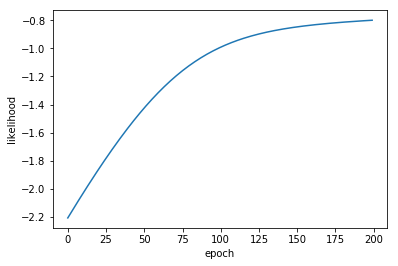

In [27]:
# 画出似然函数的图像
plt.plot(likelihood)
plt.ylabel("likelihood")
plt.xlabel("epoch")
plt.show()

In [30]:
# 之后我们使用nn.moudle来实现logistic回归
class Logistic_regression(nn.Module):
    def __init__(self):
        super(Logistic_regression, self).__init__()
        self.linear = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        y_out  = self.linear(x)
        y_pred = self.sigmoid(y_out)
        return y_pred
model = Logistic_regression()

criterion = nn.BCELoss() # 交叉熵损失
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # 随机梯度下降，则我们不需要写梯度下降函数
costs = []
for epoch in range(EPOCHS):
    out = model(x)
    loss = criterion(out, y)
    costs.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("loss为{}".format(loss))
    

loss为1.2822695970535278
loss为1.2778640985488892
loss为1.2734736204147339
loss为1.2690982818603516
loss为1.2647379636764526
loss为1.2603915929794312
loss为1.2560611963272095
loss为1.2517447471618652
loss为1.247443437576294
loss为1.243156909942627
loss为1.2388851642608643
loss为1.2346283197402954
loss为1.2303855419158936
loss为1.226158857345581
loss为1.221946358680725
loss为1.2177486419677734
loss为1.213565468788147
loss为1.2093971967697144
loss为1.2052443027496338
loss为1.2011054754257202
loss为1.1969819068908691
loss为1.1928725242614746
loss为1.188778281211853
loss为1.184699296951294
loss为1.1806340217590332
loss为1.1765843629837036
loss为1.172548770904541
loss为1.16852867603302
loss为1.1645222902297974
loss为1.1605310440063477
loss为1.1565544605255127
loss为1.1525930166244507
loss为1.1486454010009766
loss为1.1447129249572754
loss为1.1407946348190308
loss为1.1368913650512695
loss为1.1330028772354126
loss为1.1291282176971436
loss为1.125268578529358
loss为1.1214238405227661
loss为1.1175931692123413
loss为1.1137775182724
loss为1

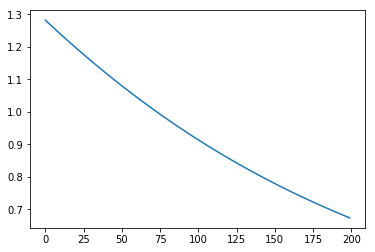

In [34]:
# 然后我们画一下图
plt.plot(costs)
plt.show()